In [14]:
import pandas as pd

In [15]:
# Cargar datasets de entrenamiento y test
movies = pd.read_csv('../data/raw/movies.csv')
ratings = pd.read_csv('../data/raw/ratings.csv')

In [16]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [17]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [18]:
# Información basica de los datasets
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [19]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [20]:
# Verificar valores nulos
print(movies.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


In [21]:
print(ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [22]:
# Verificar valores duplicados
print(movies.duplicated().sum())
print(ratings.duplicated().sum())

0
0


In [46]:
# Visualizar la distribución de las calificaciones
import matplotlib.pyplot as plt
import seaborn as sns

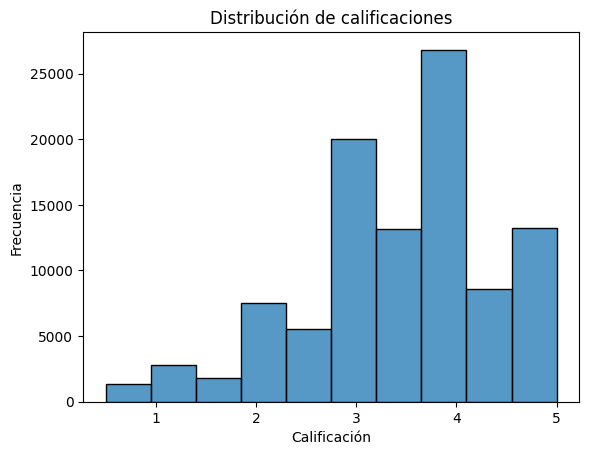

In [24]:
# Histrograma de calificaciones
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title('Distribución de calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

In [25]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
movies_counts =  ratings['movieId'].value_counts()
print(movies_counts.head())

movieId
356     329
318     317
296     307
593     279
2571    278
Name: count, dtype: int64


In [27]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
movies_counts.head()

movieId
356     329
318     317
296     307
593     279
2571    278
Name: count, dtype: int64

In [30]:
combined_df = ratings.merge(movies, on='movieId', how='inner')
print(combined_df.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


### Calcular número de calificaciones por película

In [31]:
popular_movies = combined_df.groupby('title').size().sort_values(ascending=False)
print(popular_movies.head())

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
dtype: int64


### Calcular calificación promedio por película

In [32]:
avg_ratings = combined_df.groupby('title')['rating'].mean().sort_values(ascending=False)
print(avg_ratings.head())

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64


### Separar géneros en columnas individuales

In [33]:
combined_df['genres_split'] = combined_df['genres'].str.split('|')
print(combined_df.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                               Comedy|Romance   
2                        Action|Crime|Thriller   
3                             Mystery|Thriller   
4                       Crime|Mystery|Thriller   

                                        genres_split  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                                  [Comedy, Romance]  
2                          [Action, Crime, Thriller]  
3                                [Mystery, Thriller]  
4  

In [34]:
combined_df

,userId,movieId,rating,timestamp,title,genres,genres_split
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]"
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,"[Drama, Horror, Thriller]"
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,"[Action, Crime, Thriller]"
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,[Horror]
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,"[Action, Sci-Fi]"


In [35]:
# Eliminar columnas innecesarias como timestamp
combined_df.drop(columns=['timestamp'], inplace=True)

In [36]:
combined_df

,userId,movieId,rating,title,genres,genres_split
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]"
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]"
...,...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),Drama|Horror|Thriller,"[Drama, Horror, Thriller]"
100832,610,168248,5.0,John Wick: Chapter Two (2017),Action|Crime|Thriller,"[Action, Crime, Thriller]"
100833,610,168250,5.0,Get Out (2017),Horror,[Horror]
100834,610,168252,5.0,Logan (2017),Action|Sci-Fi,"[Action, Sci-Fi]"


In [38]:
print(combined_df.isnull().sum())

userId          0
movieId         0
rating          0
title           0
genres          0
genres_split    0
dtype: int64


In [39]:
combined_df['genres_split'] = combined_df['genres'].str.split('|')

In [40]:
combined_df.head()

,userId,movieId,rating,title,genres,genres_split
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]"
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]"


### Peliculas mejor calificadas (con al menos X calificaciones)

In [42]:
movies_stats = combined_df.groupby('title').agg({'rating' : ['mean', 'count']})
movies_stats.columns = ['avg_rating', 'num_ratings']

In [44]:
filtered_movies = movies_stats[movies_stats['num_ratings'] >= 50].sort_values(by='avg_rating', ascending=False)
print(filtered_movies.head())

                                                    avg_rating  num_ratings
title                                                                      
Shawshank Redemption, The (1994)                      4.429022          317
Godfather, The (1972)                                 4.289062          192
Fight Club (1999)                                     4.272936          218
Cool Hand Luke (1967)                                 4.271930           57
Dr. Strangelove or: How I Learned to Stop Worry...    4.268041           97


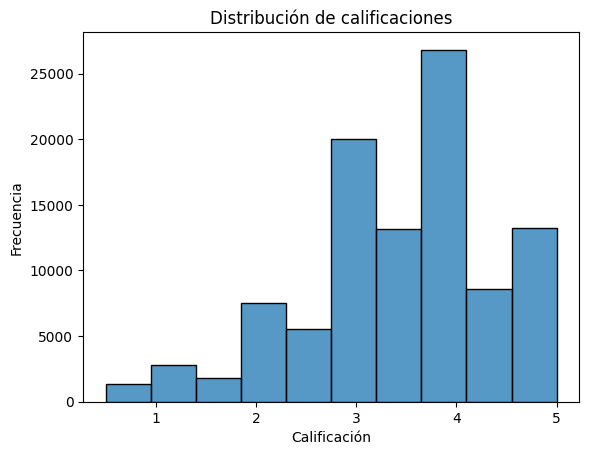

In [ ]:
sns.histplot(combined_df['rating'], bins=10, kde=False)


plt.title('Distribución de calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

### Modelo de recomendación basado en popularidad

In [50]:
def recomend_popular_movies(movies_stats, min_ratings=50, top_n=10):
    popular = movies_stats[movies_stats['num_ratings'] >= min_ratings]
    return popular.sort_values(by='avg_rating', ascending=False).head(top_n)
print(recomend_popular_movies(movies_stats))

                                                    avg_rating  num_ratings
title                                                                      
Shawshank Redemption, The (1994)                      4.429022          317
Godfather, The (1972)                                 4.289062          192
Fight Club (1999)                                     4.272936          218
Cool Hand Luke (1967)                                 4.271930           57
Dr. Strangelove or: How I Learned to Stop Worry...    4.268041           97
Rear Window (1954)                                    4.261905           84
Godfather: Part II, The (1974)                        4.259690          129
Departed, The (2006)                                  4.252336          107
Goodfellas (1990)                                     4.250000          126
Casablanca (1942)                                     4.240000          100


### Recomendación basada en similitud de usuarios (filtro colaborativo)

In [51]:
user_movie_matrix = combined_df.pivot_table(index='userId', columns='title', values='rating')

In [58]:
from sklearn.metrics.pairwise import cosine_similarity


In [59]:
movie_similarity = cosine_similarity(user_movie_matrix.fillna(0).T)
similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

In [60]:
def recomend_popular_movies(movies_title, similarity_df, top_n=5):
    similar_scores = similarity_df[movies_title].sort_values(ascending=False)[1:top_n+1]
    return similar_scores
print(recomend_popular_movies('Toy Story (1995)', similarity_df))

title
Toy Story 2 (1999)                           0.572601
Jurassic Park (1993)                         0.565637
Independence Day (a.k.a. ID4) (1996)         0.564262
Star Wars: Episode IV - A New Hope (1977)    0.557388
Forrest Gump (1994)                          0.547096
Name: Toy Story (1995), dtype: float64


In [61]:
harry_potter_movies = combined_df[combined_df['title'].str.contains('Harry Potter', case = False, na=False)]
print(harry_potter_movies.head())

      userId  movieId  rating  \
513        4     4896     4.0   
948        7     4896     4.0   
960        7     5816     4.5   
976        7     8368     2.5   
1202      10    69844     3.0   

                                                  title  \
513   Harry Potter and the Sorcerer's Stone (a.k.a. ...   
948   Harry Potter and the Sorcerer's Stone (a.k.a. ...   
960      Harry Potter and the Chamber of Secrets (2002)   
976     Harry Potter and the Prisoner of Azkaban (2004)   
1202      Harry Potter and the Half-Blood Prince (2009)   

                                      genres  \
513               Adventure|Children|Fantasy   
948               Adventure|Children|Fantasy   
960                        Adventure|Fantasy   
976                   Adventure|Fantasy|IMAX   
1202  Adventure|Fantasy|Mystery|Romance|IMAX   

                                      genres_split  
513                 [Adventure, Children, Fantasy]  
948                 [Adventure, Children, Fantasy] 

In [62]:
print(recomend_popular_movies('Harry Potter and the Chamber of Secrets (2002)',similarity_df))

title
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.779561
Harry Potter and the Prisoner of Azkaban (2004)                                                   0.769212
Harry Potter and the Goblet of Fire (2005)                                                        0.715706
Harry Potter and the Order of the Phoenix (2007)                                                  0.670992
Pirates of the Caribbean: Dead Man's Chest (2006)                                                 0.585865
Name: Harry Potter and the Chamber of Secrets (2002), dtype: float64
